## Setup the notebook

In [1]:
import os, sys

if os.environ.get("KAGGLE_KERNEL_RUN_TYPE"):
    from kaggle_secrets import UserSecretsClient
    import subprocess
    
    user_secrets = UserSecretsClient()
    token = user_secrets.get_secret("git_token")
    
    repo_url = f"git+https://{token}@github.com/Blaku03/PitchAnalyzer_AI.git"
    
    subprocess.check_call(
        ["pip", "install", repo_url],
        stdout=subprocess.DEVNULL,
        stderr=subprocess.STDOUT
    )
    video_path = "/kaggle/input/pitchtest/B1606b0e6_1 (91).mp4"
    output_path = "./output_video.avi"
else:
    # reloads the code during development
    %load_ext autoreload
    %autoreload 2
    # ensure project root (one level up) is on PATH
    ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
    if ROOT not in sys.path:
        sys.path.insert(0, ROOT)

    video_path = "../sample_data/B1606b0e6_1 (91).mp4"
    output_path = "../output_videos/output_video.avi"
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

## Import the model

In [2]:
from utils.import_models import ModelImporter
players_model = ModelImporter().download_player_model()

Model downloaded to /home/bbrzyski/.cache/kagglehub/models/blaku03/player-detection/pyTorch/player_detectionv1_1/1



0: 544x960 1 ball, 21 players, 3 referees, 33.4ms
1: 544x960 1 goalkeeper, 22 players, 1 referee, 33.4ms
2: 544x960 1 ball, 1 goalkeeper, 26 players, 1 referee, 33.4ms
3: 544x960 1 ball, 21 players, 1 referee, 33.4ms
4: 544x960 1 goalkeeper, 21 players, 1 referee, 33.4ms
5: 544x960 22 players, 1 referee, 33.4ms
6: 544x960 1 ball, 1 goalkeeper, 22 players, 33.4ms
7: 544x960 21 players, 1 referee, 33.4ms
8: 544x960 1 ball, 1 goalkeeper, 22 players, 3 referees, 33.4ms
9: 544x960 1 ball, 21 players, 1 referee, 33.4ms
Speed: 2.3ms preprocess, 33.4ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 960)

0: 544x960 21 players, 2 referees, 33.2ms
1: 544x960 22 players, 2 referees, 33.2ms
2: 544x960 20 players, 2 referees, 33.2ms
3: 544x960 1 ball, 20 players, 2 referees, 33.2ms
4: 544x960 1 ball, 20 players, 2 referees, 33.2ms
5: 544x960 20 players, 2 referees, 33.2ms
6: 544x960 1 ball, 20 players, 2 referees, 33.2ms
7: 544x960 1 ball, 20 players, 2 referees, 33.2ms
8: 544x960 1 b

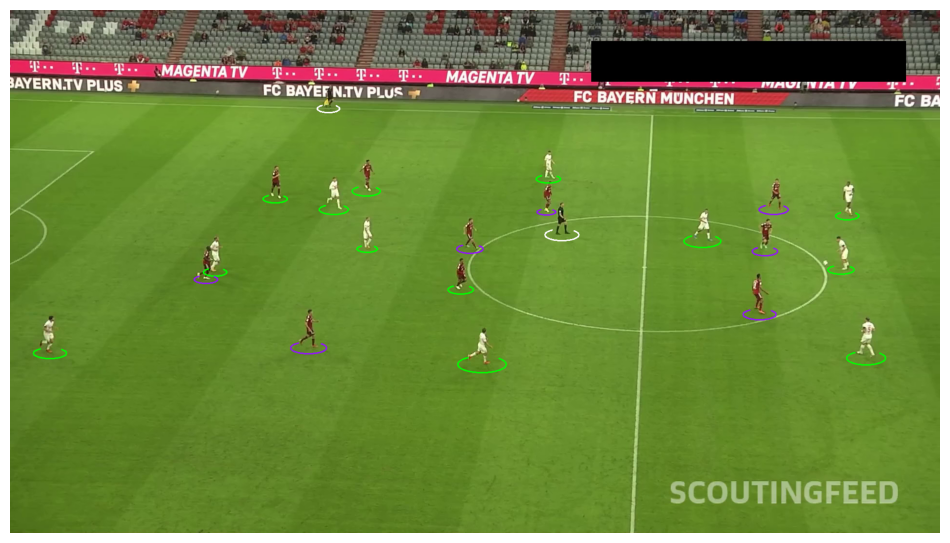

In [10]:
from annotators.player_annotator import PlayersAnnotator
from trackers.game_tracker import GameTracker
from utils.video_utils import read_video
from utils.notebook_utils import show_image
import itertools

frame_generator = read_video(video_path)
first_frame = next(frame_generator)

tracks_generator =  GameTracker(players_model).get_detections_from_frames(frame_generator)
first_track = next(tracks_generator)

annotated_sample_image = PlayersAnnotator.annotate_frame(first_frame.copy(), first_track)
show_image(annotated_sample_image)

In [13]:
from utils.video_utils import save_video

frame_generator = read_video(video_path)
tracks_generator =  GameTracker(players_model).get_detections_from_frames(frame_generator)

annotated_frames_generator = PlayersAnnotator.annotate_video(frame_generator, tracks_generator)
save_video(annotated_frames_generator, output_path)


0: 544x960 1 ball, 1 goalkeeper, 23 players, 1 referee, 33.4ms
1: 544x960 1 goalkeeper, 22 players, 3 referees, 33.4ms
2: 544x960 1 ball, 21 players, 2 referees, 33.4ms
3: 544x960 1 ball, 22 players, 2 referees, 33.4ms
4: 544x960 1 ball, 22 players, 1 referee, 33.4ms
5: 544x960 1 goalkeeper, 22 players, 33.4ms
6: 544x960 1 ball, 1 goalkeeper, 21 players, 1 referee, 33.4ms
7: 544x960 1 goalkeeper, 23 players, 2 referees, 33.4ms
8: 544x960 1 goalkeeper, 22 players, 2 referees, 33.4ms
9: 544x960 1 ball, 19 players, 2 referees, 33.4ms
Speed: 2.3ms preprocess, 33.4ms inference, 0.7ms postprocess per image at shape (1, 3, 544, 960)

0: 544x960 21 players, 2 referees, 33.3ms
1: 544x960 22 players, 2 referees, 33.3ms
2: 544x960 20 players, 2 referees, 33.3ms
3: 544x960 1 ball, 20 players, 2 referees, 33.3ms
4: 544x960 1 ball, 20 players, 2 referees, 33.3ms
5: 544x960 20 players, 2 referees, 33.3ms
6: 544x960 1 ball, 20 players, 2 referees, 33.3ms
7: 544x960 1 ball, 20 players, 2 referees, 33.

1

In [7]:
from assigners.player_ball_assigner import PlayerBallAssigner

frame_generator = read_video(video_path)
tracks_generator =  GameTracker(players_model).get_detections_from_frames(frame_generator)
next(tracks_generator)


0: 544x960 1 ball, 1 goalkeeper, 23 players, 1 referee, 33.5ms
1: 544x960 1 ball, 20 players, 1 referee, 33.5ms
2: 544x960 1 goalkeeper, 22 players, 2 referees, 33.5ms
3: 544x960 1 goalkeeper, 22 players, 1 referee, 33.5ms
4: 544x960 1 ball, 20 players, 2 referees, 33.5ms
5: 544x960 1 ball, 21 players, 2 referees, 33.5ms
6: 544x960 1 goalkeeper, 21 players, 2 referees, 33.5ms
7: 544x960 19 players, 2 referees, 33.5ms
8: 544x960 1 ball, 1 goalkeeper, 23 players, 1 referee, 33.5ms
9: 544x960 2 balls, 1 goalkeeper, 22 players, 33.5ms
Speed: 2.2ms preprocess, 33.5ms inference, 0.7ms postprocess per image at shape (1, 3, 544, 960)

0: 544x960 1 ball, 20 players, 2 referees, 33.3ms
1: 544x960 21 players, 2 referees, 33.3ms
2: 544x960 22 players, 2 referees, 33.3ms
3: 544x960 20 players, 2 referees, 33.3ms
4: 544x960 1 ball, 20 players, 2 referees, 33.3ms
5: 544x960 1 ball, 20 players, 2 referees, 33.3ms
6: 544x960 20 players, 2 referees, 33.3ms
7: 544x960 1 ball, 20 players, 2 referees, 33.

PlayersDetections(players_detections=Detections(xyxy=array([[     944.83,       656.4,      996.21,      733.04],
       [     1747.7,       633.7,      1787.6,      717.89],
       [     1411.7,      410.73,      1450.7,      478.29],
       [     596.06,      617.24,      639.03,      698.19],
       [     1719.5,      353.85,      1743.1,      426.23],
       [     61.683,         631,      95.136,      709.15],
       [     1565.1,      348.02,      1594.3,      415.07],
       [     1101.9,      290.64,      1127.1,       350.2],
       [      537.7,      321.94,      560.14,      389.79],
       [     936.46,      429.44,      965.25,      494.02],
       [      721.4,      309.11,      752.53,      375.16],
       [     653.42,      345.84,      685.15,      412.82],
       [     920.36,      512.14,      942.27,      577.65],
       [     1532.1,      543.76,      1566.7,      628.93],
       [     1547.6,      430.41,      1574.5,      494.84],
       [     728.62,      427.58